<a href="https://colab.research.google.com/github/Inishpy/ML-and-DL-Project-works/blob/main/KNN%2C_SVM%2C_Naive_Bayes_4th_Sem_MidSem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Install kaggle API and download dataset
!pip install kaggle
!mkdir ~/.kaggle
!echo '{"username":"inish7","key":"07cc12f67ac219d821cc3860a3201910"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud -p datasets
!unzip datasets/creditcardfraud.zip -d datasets




# Load dataset into a pandas dataframe
data = pd.read_csv('datasets/creditcard.csv')

# Preprocess the dataset by removing null values and scaling the data

data.dropna(inplace=True)

Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Trnsactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of fraud Transactions is {}'.format(fraud_percentage))

data.info()

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))



# Split dataset into training and testing sets
X = data.drop(['Class'], axis=1)
print(X)
X1 = X[0: int(0.3*len(X))]
X2 = X[0: int(0.6*len(X))]
X3 = X[0: len(X)]

y = data['Class']
y1 =  y[0: int(0.3*len(y))]
y2 =  y[0: int(0.6*len(y))]
y3 =  y[0: len(y)]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

# Define SVM model and fit it to the training data
svm_model1 = SVC(kernel='linear', C=1)
svm_model2 = SVC(kernel='linear', C=1)
svm_model3 = SVC(kernel='linear', C=1)

svm_model1.fit(X1_train, y1_train)
svm_model2.fit(X2_train, y2_train)
svm_model3.fit(X3_train, y3_train)

# Define Naive Bayes model and fit it to the training data
nb_model1 = GaussianNB()
nb_model2 = GaussianNB()
nb_model3 = GaussianNB()

nb_model1.fit(X1_train, y1_train)
nb_model2.fit(X2_train, y2_train)
nb_model3.fit(X3_train, y3_train)

# Define KNN model and fit it to the training data
knn_model1 = KNeighborsClassifier(n_neighbors=5)
knn_model2 = KNeighborsClassifier(n_neighbors=5)
knn_model3 = KNeighborsClassifier(n_neighbors=5)

knn_model1.fit(X1_train, y1_train)
knn_model2.fit(X2_train, y2_train)
knn_model3.fit(X3_train, y3_train)

# Make predictions using each model on the testing data
svm_pred1 = svm_model1.predict(X1_test)
svm_pred2 = svm_model2.predict(X2_test)
svm_pred3 = svm_model3.predict(X3_test)

nb_pred1 = nb_model1.predict(X1_test)
nb_pred2 = nb_model2.predict(X2_test)
nb_pred3 = nb_model3.predict(X3_test)

knn_pred1 = knn_model1.predict(X1_test)
knn_pred2 = knn_model2.predict(X2_test)
knn_pred3 = knn_model3.predict(X3_test)






Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 86% 57.0M/66.0M [00:00<00:00, 168MB/s]
100% 66.0M/66.0M [00:00<00:00, 170MB/s]
Archive:  datasets/creditcardfraud.zip
  inflating: datasets/creditcard.csv  
Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, classification_report

# ...




# Evaluate the performance of each model
svm_acc1 = accuracy_score(y1_test, svm_pred1)
svm_acc2 = accuracy_score(y2_test, svm_pred2)
svm_acc3 = accuracy_score(y3_test, svm_pred3)

nb_acc1 = accuracy_score(y1_test, nb_pred1)
nb_acc2 = accuracy_score(y2_test, nb_pred2)
nb_acc3 = accuracy_score(y3_test, nb_pred3)

knn_acc1 = accuracy_score(y1_test, knn_pred1)
knn_acc2 = accuracy_score(y2_test, knn_pred2)
knn_acc3 = accuracy_score(y3_test, knn_pred3)

svm_prec1 = precision_score(y1_test, svm_pred1)
svm_prec2 = precision_score(y2_test, svm_pred2)
svm_prec3 = precision_score(y3_test, svm_pred3)

nb_prec1 = precision_score(y1_test, nb_pred1)
nb_prec2 = precision_score(y2_test, nb_pred2)
nb_prec3 = precision_score(y3_test, nb_pred3)

knn_prec1 = precision_score(y1_test, knn_pred1)
knn_prec2 = precision_score(y2_test, knn_pred2)
knn_prec3 = precision_score(y3_test, knn_pred3)

svm_rec1 = recall_score(y1_test, svm_pred1)
svm_rec2 = recall_score(y2_test, svm_pred2)
svm_rec3 = recall_score(y3_test, svm_pred3)

nb_rec1 = recall_score(y1_test, nb_pred1)
nb_rec2 = recall_score(y2_test, nb_pred2)
nb_rec3 = recall_score(y3_test, nb_pred3)

knn_rec1 = recall_score(y1_test, knn_pred1)
knn_rec2 = recall_score(y2_test, knn_pred2)
knn_rec3 = recall_score(y3_test, knn_pred3)

svm_f11 = f1_score(y1_test, svm_pred1)
svm_f12 = f1_score(y2_test, svm_pred2)
svm_f13 = f1_score(y3_test, svm_pred3)

nb_f11 = f1_score(y1_test, nb_pred1)
nb_f12 = f1_score(y2_test, nb_pred2)
nb_f13 = f1_score(y3_test, nb_pred3)

knn_f11 = f1_score(y1_test, knn_pred1)
knn_f12 = f1_score(y2_test, knn_pred2)
knn_f13 = f1_score(y3_test, knn_pred3)

svm_logloss1 = log_loss(y1_test, svm_model1.predict(X1_test))
svm_logloss2 = log_loss(y2_test, svm_model2.predict(X2_test))
svm_logloss3 = log_loss(y3_test, svm_model3.predict(X3_test))

nb_logloss1 = log_loss(y1_test, nb_model1.predict(X1_test))
nb_logloss2 = log_loss(y2_test, nb_model2.predict(X2_test))
nb_logloss3 = log_loss(y3_test, nb_model3.predict(X3_test))

knn_logloss1 = log_loss(y1_test, knn_model1.predict(X1_test))
knn_logloss2 = log_loss(y2_test, knn_model2.predict(X2_test))
knn_logloss3 = log_loss(y3_test, knn_model3.predict(X3_test))

svm_cm1 = confusion_matrix(y1_test, svm_pred1)
svm_cm2 = confusion_matrix(y2_test, svm_pred2)
svm_cm3 = confusion_matrix(y3_test, svm_pred3)

nb_cm1 = confusion_matrix(y1_test, nb_pred1)
nb_cm2 = confusion_matrix(y2_test, nb_pred2)
nb_cm3 = confusion_matrix(y3_test, nb_pred3)

knn_cm1 = confusion_matrix(y1_test, knn_pred1)
knn_cm2 = confusion_matrix(y2_test, knn_pred2)
knn_cm3 = confusion_matrix(y3_test, knn_pred3)

svm_cr1 = classification_report(y1_test, svm_pred1)
svm_cr2 = classification_report(y2_test, svm_pred2)
svm_cr3 = classification_report(y3_test, svm_pred3)


nb_cr1 = classification_report(y1_test, nb_pred1)
nb_cr2 = classification_report(y2_test, nb_pred2)
nb_cr3 = classification_report(y3_test, nb_pred3)

knn_cr1 = classification_report(y1_test, knn_pred1)
knn_cr2 = classification_report(y2_test, knn_pred2)
knn_cr3 = classification_report(y3_test, knn_pred3)

svm_specificity1 = svm_cm1[0,0]/(svm_cm1[0,0]+svm_cm1[0,1])
svm_specificity2 = svm_cm2[0,0]/(svm_cm2[0,0]+svm_cm2[0,1])
svm_specificity3 = svm_cm3[0,0]/(svm_cm3[0,0]+svm_cm3[0,1])

nb_specificity1 = nb_cm1[0,0]/(nb_cm1[0,0]+nb_cm1[0,1])
nb_specificity2 = nb_cm2[0,0]/(nb_cm2[0,0]+nb_cm2[0,1])
nb_specificity3 = nb_cm3[0,0]/(nb_cm3[0,0]+nb_cm3[0,1])

knn_specificity1 = knn_cm1[0,0]/(knn_cm1[0,0]+knn_cm1[0,1])
knn_specificity2 = knn_cm2[0,0]/(knn_cm2[0,0]+knn_cm2[0,1])
knn_specificity3 = knn_cm3[0,0]/(knn_cm3[0,0]+knn_cm3[0,1])



results = {
    'oneThird': {
        'SVM': [svm_acc1,svm_prec1, svm_rec1, svm_f11, svm_logloss1, svm_specificity1],
        'NB': [nb_acc1, nb_prec1, nb_rec1, nb_f11, nb_logloss1, nb_specificity1],
        'KNN': [knn_acc1, knn_prec1, knn_rec1, knn_f11, knn_logloss1, knn_specificity1]
    },
    'TwoThird': {
        'SVM': [svm_acc2,svm_prec2, svm_rec2, svm_f12, svm_logloss2, svm_specificity2],
        'NB': [nb_acc2, nb_prec2, nb_rec2, nb_f12, nb_logloss2, nb_specificity2],
        'KNN': [knn_acc2, knn_prec2, knn_rec2, knn_f12, knn_logloss2, knn_specificity2]
    },
    'Whole': {
        'SVM': [svm_acc3,svm_prec3, svm_rec3, svm_f13, svm_logloss3, svm_specificity3],
        'NB': [nb_acc3, nb_prec3, nb_rec3, nb_f13, nb_logloss3, nb_specificity3],
        'KNN': [knn_acc3, knn_prec3, knn_rec3, knn_f13, knn_logloss3, knn_specificity3]
    }
}

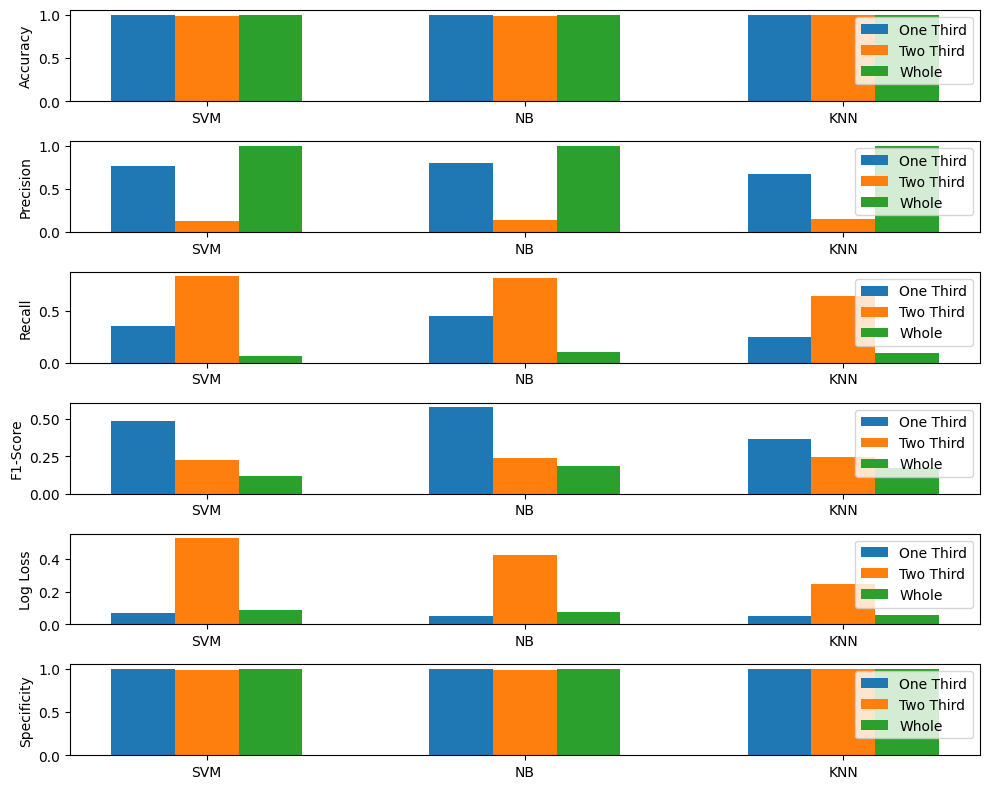

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
models = ['SVM', 'NB', 'KNN']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Log Loss', 'Specificity']
labels = ['One Third', 'Two Third', 'Whole']
data = np.array([    [[svm_acc1, nb_acc1, knn_acc1], [svm_acc2, nb_acc2, knn_acc2], [svm_acc3, nb_acc3, knn_acc3]],
    [[svm_prec1, nb_prec1, knn_prec1], [svm_prec2, nb_prec2, knn_prec2], [svm_prec3, nb_prec3, knn_prec3]],
    [[svm_rec1, nb_rec1, knn_rec1], [svm_rec2, nb_rec2, knn_rec2], [svm_rec3, nb_rec3, knn_rec3]],
    [[svm_f11, nb_f11, knn_f11], [svm_f12, nb_f12, knn_f12], [svm_f13, nb_f13, knn_f13]],
    [[svm_logloss1, nb_logloss1, knn_logloss1], [svm_logloss2, nb_logloss2, knn_logloss2], [svm_logloss3, nb_logloss3, knn_logloss3]],
    [[svm_specificity1, nb_specificity1, knn_specificity1], [svm_specificity2, nb_specificity2, knn_specificity2], [svm_specificity3, nb_specificity3, knn_specificity3]]
])

# Define the color scheme for each model
colors = {
    'SVM': '#FFA07A',
    'NB': '#87CEEB',
    'KNN': '#98FB98'
}

# Set up the figure
fig, axs = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 8))

# Plot the bars for each metric
for i in range(len(metrics)):
    ax = axs[i]
    x = np.arange(len(models))
    for j in range(len(labels)):
        ax.bar(x + j * width, data[i].T[j], width, label=labels[j])
    ax.set_xticks(x + (len(labels) - 1) * width / 2)
    ax.set_xticklabels(models)
    ax.set_ylabel(metrics[i])
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
print('SVM')
print(svm_cr)
print("Naive Bayes")
print(nb_cr)
print("K-NN")
print(knn_cr)


SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.67      0.25      0.37       147

    accuracy                           1.00     85443
   macro avg       0.84      0.63      0.68     85443
weighted avg       1.00      1.00      1.00     85443

Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.15      0.65      0.25       147

    accuracy                           0.99     85443
   macro avg       0.58      0.82      0.62     85443
weighted avg       1.00      0.99      1.00     85443

K-NN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       1.00      0.10      0.17       147

    accuracy                           1.00     85443
   macro avg       1.00      0.55      0.59     85443
weighted avg       1.00      1.00      1.00     85443

In [ ]:
# Plot the results using graphs
x_labels = ['SVM', 'Naive Bayes', 'KNN']
acc_scores = [svm_acc, nb_acc, knn_acc]
prec_scores = [svm_prec, nb_prec, knn_prec]
rec_scores = [svm_rec, nb_rec, knn_rec]
f1_scores = [svm_f1, nb_f1, knn_f1]
logLoss = [svm_logloss, nb_logloss, knn_logloss]
specificity = [svm_specificity, nb_specificity, knn_specificity]

print(acc_scores)
print(prec_scores)
print(rec_scores)
print(f1_scores)
print(logLoss)
print(specificity)

fig, axs = plt.subplots(2, 3, figsize=(10, 8))

for i, j in {"Accuracy Scores":}]

axs[0, 0].bar(x_labels, acc_scores)
axs[0, 0].set_title('Accuracy Scores')
axs[0, 1].bar(x_labels, prec_scores)
axs[0, 1].set_title('Precision Scores')
axs[0, 2].bar(x_labels, rec_scores)
axs[0, 2].set_title('Recall Scores')
axs[1, 0].bar(x_labels, f1_scores)
axs[1, 0].set_title('F1 Scores')
axs[1, 1].bar(x_labels, logLoss)
axs[1, 1].set_title('Logloss')
axs[1, 2].bar(x_labels, specificity)
axs[1, 2].set_title('Specificity')
plt.show()


NameError: ignored